In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
color = sns.color_palette()
%matplotlib inline
matplotlib.style.use('ggplot')

# remove warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

# my own module
from conf.configure import Configure

In [2]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

sample_submission.csv
test.csv
train.csv



In [3]:
train = pd.read_csv(Configure.original_train_path)
test = pd.read_csv(Configure.original_test_path)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
print 'train:', train.shape
display(train.head(2))
print 'test:', test.shape
display(test.head(2))

train: (4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0


test: (4209, 377)


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0


Wow the number of rows are small with 388 columns. We should try not to overfit :)

In [6]:
def missing_data(dataframe):
    missing_df = dataframe.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df = missing_df[missing_df.missing_count > 0]
    return missing_df

In [7]:
display(missing_data(train))
display(missing_data(test))

,column_name,missing_count


,column_name,missing_count


训练集和测试集均不存在缺失数据

In [8]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["column", "column_type"]
dtype_df.groupby('column_type').aggregate('count').reset_index()

,column_type,column
0,int64,369
1,float64,1
2,object,8


# Target Variable y

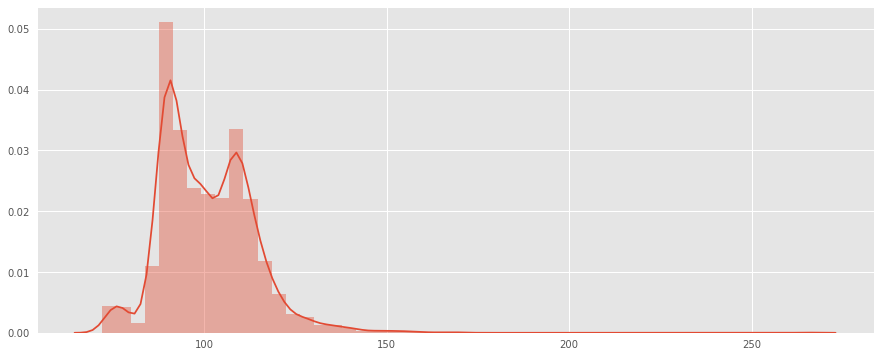

In [9]:
plt.figure(figsize=(15,6))
sns.distplot(train.y.values, bins=50, kde=True)

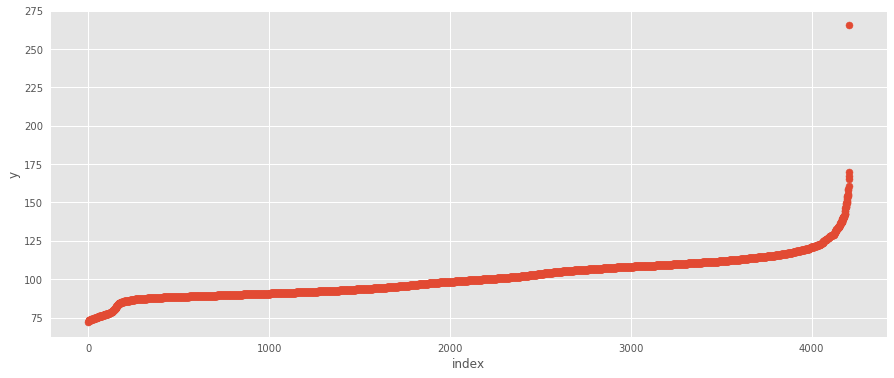

In [10]:
plt.figure(figsize=(15,6))
plt.scatter(range(train.shape[0]), np.sort(train.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

似乎有一个单独的点偏离大部分数据,可能为异常数据.

# categorical columns

In [11]:
str_columns = train.select_dtypes(include=['object']).columns
print 'str_columns:', str_columns

str_columns: Index([u'X0', u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X8'], dtype='object')


In [12]:
for c in str_columns:
    print 'feature {} train set unique size {}, \t test set unique size {}'.format(c, len(set(train[c])), len(set(test[c])))

feature X0 train set unique size 47, 	 test set unique size 49
feature X1 train set unique size 27, 	 test set unique size 27
feature X2 train set unique size 44, 	 test set unique size 45
feature X3 train set unique size 7, 	 test set unique size 7
feature X4 train set unique size 4, 	 test set unique size 4
feature X5 train set unique size 29, 	 test set unique size 32
feature X6 train set unique size 12, 	 test set unique size 12
feature X8 train set unique size 25, 	 test set unique size 25


# X0

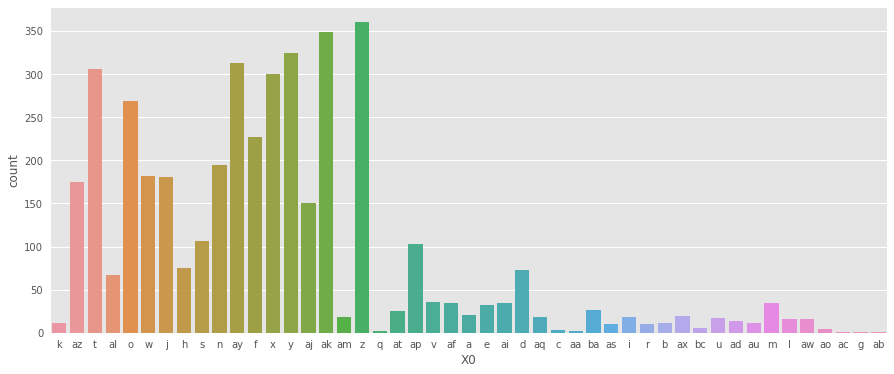

In [13]:
# X0 特征出现次数分布
plt.figure(figsize=(15,6))
sns.countplot(train['X0'])

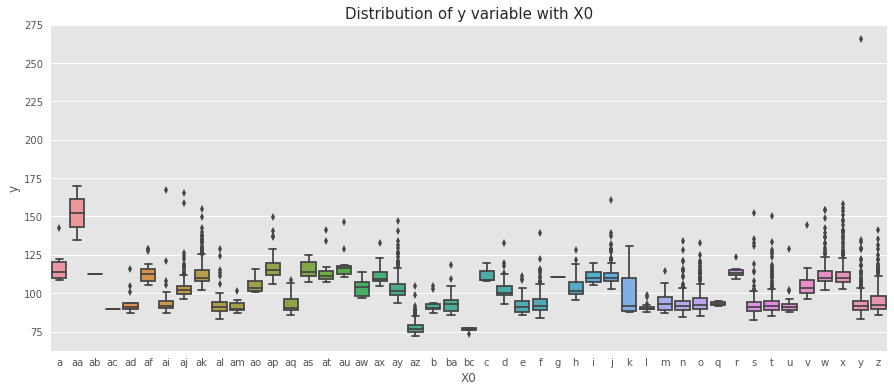

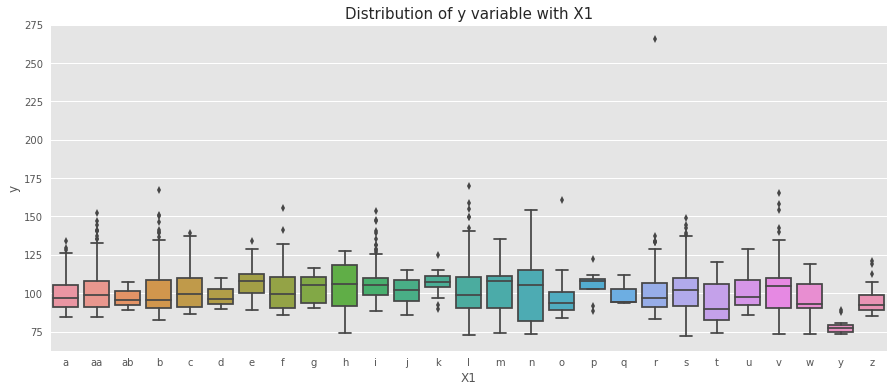

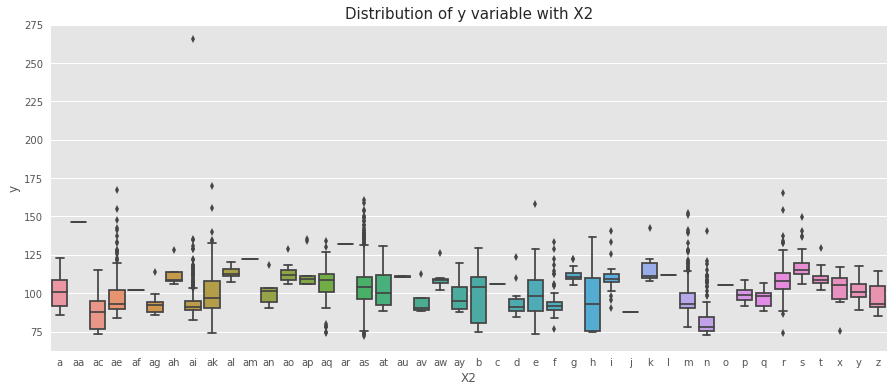

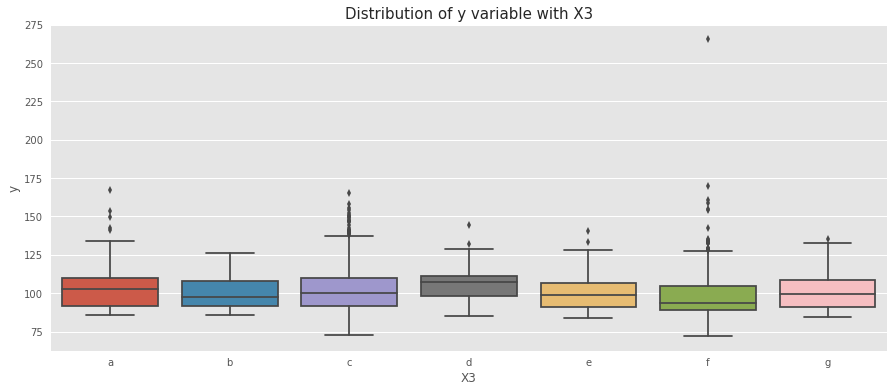

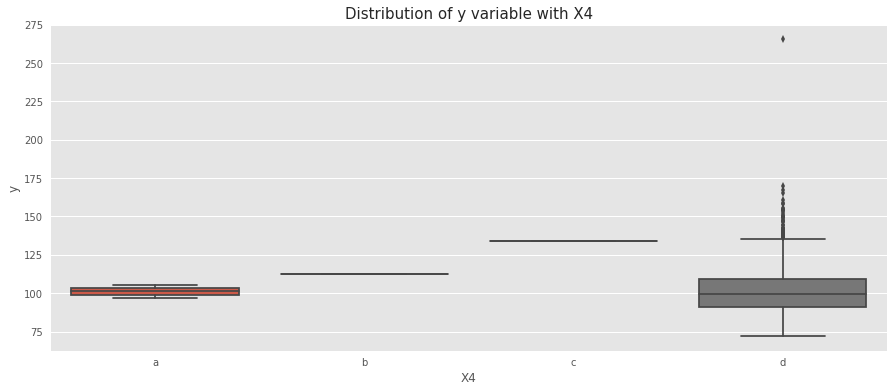

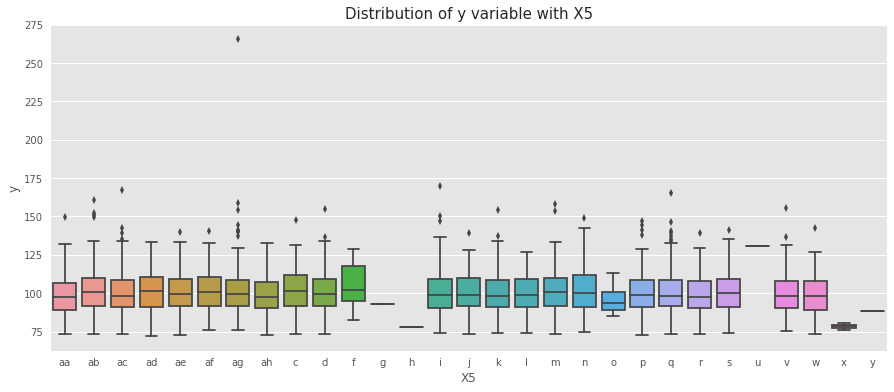

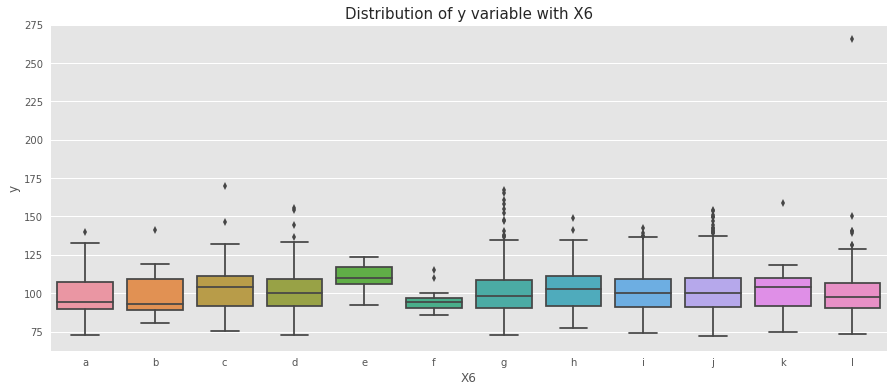

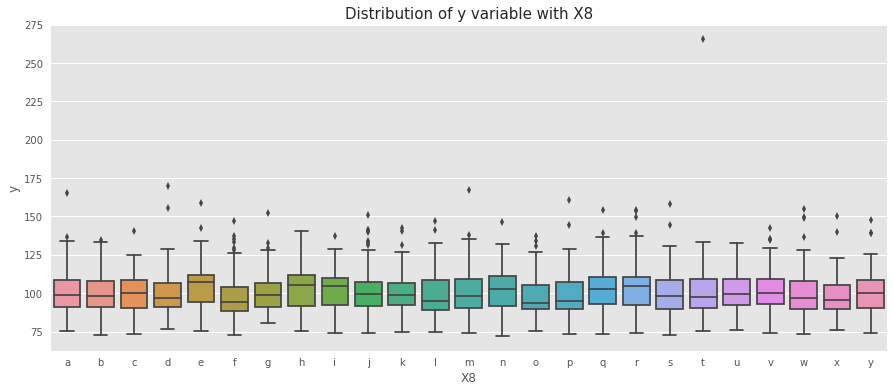

In [14]:
# X0 于 y 的关系
for var_name in str_columns:
    col_order = np.sort(train[var_name].unique()).tolist()
    plt.figure(figsize=(15,6))
    sns.boxplot(x=var_name, y='y', data=train, order=col_order)
    plt.xlabel(var_name, fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title("Distribution of y variable with "+var_name, fontsize=15)
    plt.show()

# numerical columns

In [15]:
num_columns = train.select_dtypes(exclude=['object']).columns.tolist()
num_columns.remove('ID')
num_columns.remove('y')
print 'num_columns:', len(num_columns)

num_columns: 368


In [16]:
show_remove = []
for c in num_columns:
    if len(set(train[c])) < len(set(test[c])):
        show_remove.append(c)
    print 'feature {} train unique size {}, \t test unique size {}'.format(c, len(set(train[c])), len(set(test[c])))

feature X10 train unique size 2, 	 test unique size 2
feature X11 train unique size 1, 	 test unique size 2
feature X12 train unique size 2, 	 test unique size 2
feature X13 train unique size 2, 	 test unique size 2
feature X14 train unique size 2, 	 test unique size 2
feature X15 train unique size 2, 	 test unique size 2
feature X16 train unique size 2, 	 test unique size 2
feature X17 train unique size 2, 	 test unique size 2
feature X18 train unique size 2, 	 test unique size 2
feature X19 train unique size 2, 	 test unique size 2
feature X20 train unique size 2, 	 test unique size 2
feature X21 train unique size 2, 	 test unique size 2
feature X22 train unique size 2, 	 test unique size 2
feature X23 train unique size 2, 	 test unique size 2
feature X24 train unique size 2, 	 test unique size 2
feature X26 train unique size 2, 	 test unique size 2
feature X27 train unique size 2, 	 test unique size 2
feature X28 train unique size 2, 	 test unique size 2
feature X29 train unique siz

feature X187 train unique size 2, 	 test unique size 2
feature X189 train unique size 2, 	 test unique size 2
feature X190 train unique size 2, 	 test unique size 2
feature X191 train unique size 2, 	 test unique size 2
feature X192 train unique size 2, 	 test unique size 2
feature X194 train unique size 2, 	 test unique size 2
feature X195 train unique size 2, 	 test unique size 2
feature X196 train unique size 2, 	 test unique size 2
feature X197 train unique size 2, 	 test unique size 2
feature X198 train unique size 2, 	 test unique size 2
feature X199 train unique size 2, 	 test unique size 2
feature X200 train unique size 2, 	 test unique size 2
feature X201 train unique size 2, 	 test unique size 2
feature X202 train unique size 2, 	 test unique size 2
feature X203 train unique size 2, 	 test unique size 2
feature X204 train unique size 2, 	 test unique size 2
feature X205 train unique size 2, 	 test unique size 2
feature X206 train unique size 2, 	 test unique size 2
feature X2

In [17]:
show_remove

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [18]:
for c in show_remove:
    print 'feature {} train unique size {}, \t test unique size {}'.format(c, len(set(train[c])), len(set(test[c])))

feature X11 train unique size 1, 	 test unique size 2
feature X93 train unique size 1, 	 test unique size 2
feature X107 train unique size 1, 	 test unique size 2
feature X233 train unique size 1, 	 test unique size 2
feature X235 train unique size 1, 	 test unique size 2
feature X268 train unique size 1, 	 test unique size 2
feature X289 train unique size 1, 	 test unique size 2
feature X290 train unique size 1, 	 test unique size 2
feature X293 train unique size 1, 	 test unique size 2
feature X297 train unique size 1, 	 test unique size 2
feature X330 train unique size 1, 	 test unique size 2
feature X347 train unique size 1, 	 test unique size 2


In [19]:
set(train['X11']), set(test['X11']), set(train['X93']), set(test['X93'])

({0}, {0, 1}, {0}, {0, 1})

# ID variable

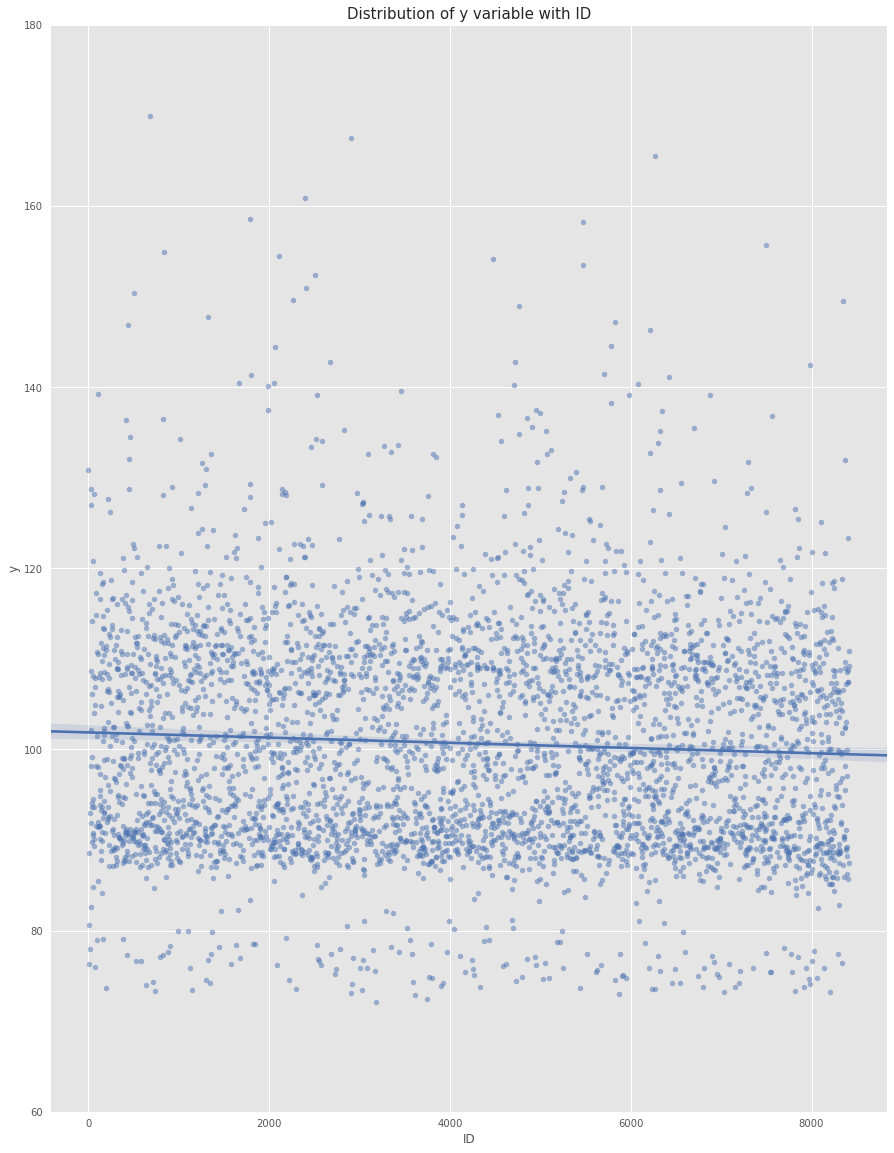

In [20]:
var_name = 'ID'
plt.figure(figsize=(15,20))
sns.regplot(x=var_name, y='y', data=train, scatter_kws={'alpha':0.5, 's':30}, color=color[0])
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.ylim(60,180)
plt.show()

可以看出 ID 与 y 有一点点的斜率,可能 y 与 ID 有关,需要查看 train/test 的 ID 分布,了解数据集的划分策略

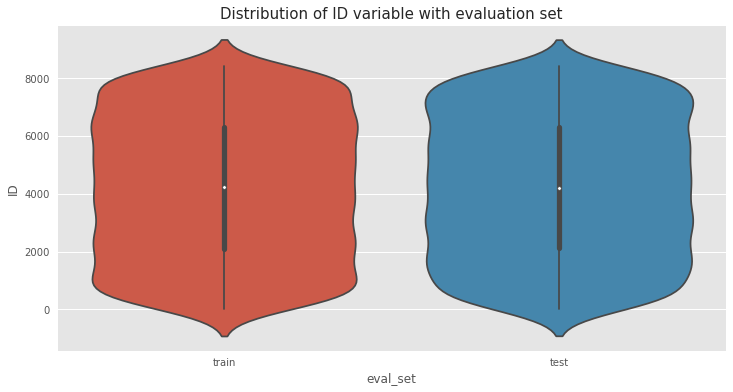

In [21]:
plt.figure(figsize=(6,10))
train['eval_set'] = "train"
test['eval_set'] = "test"
full_df = pd.concat([train[["ID","eval_set"]], test[["ID","eval_set"]]], axis=0)

plt.figure(figsize=(12,6))
sns.violinplot(x="eval_set", y='ID', data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.title("Distribution of ID variable with evaluation set", fontsize=15)
plt.show()

train 和 test 的 ID 分布基本一致, ID可能为随机分布.

# Feature Importants

In [22]:
from sklearn import preprocessing
import xgboost as xgb

In [23]:
for c in str_columns:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values))

In [24]:
y_train = train['y']
del train['ID']
del train['y']
del train['eval_set']

In [25]:
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

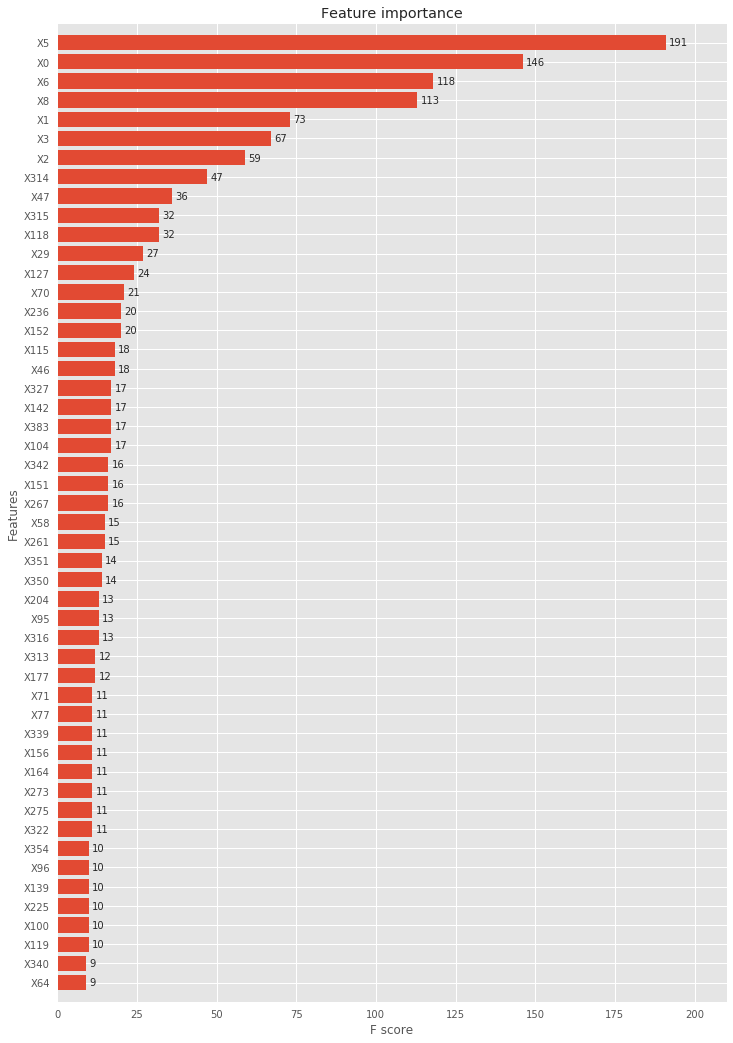

In [26]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train, y_train, feature_names=train.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()